## **Predicting Seasonal Flu Vaccination Uptake**

## Final Project Submission

* Student name: Colleta Kiilu
* Student pace:  **part time** 
* Scheduled project submission date/time: 23/12/2024
* Instructor name: Samuel Karu
* Blog post URL: https://github.com/Collz472/Phase_3_Project_Colleta.git

# **Business Understanding**


## **Project Background**

Vaccination is a critical public health intervention for controlling and preventing the spread of infectious diseases. 
By providing immunization at an individual level and fostering herd immunity within communities, vaccines play a very important role in safeguarding global health. 
In 2009, the H1N1 influenza virus, commonly known as "swine flu," caused a global pandemic, resulting in an estimated 151,000 to 575,000 deaths worldwide in its first year. 
To combat this pandemic, an H1N1 vaccine was made available in October 2009.

The United States National 2009 H1N1 Flu Survey, conducted in late 2009 and early 2010, collected data on vaccination uptake for both H1N1 and seasonal flu. 
The survey explored respondents’ vaccination status alongside information about their socioeconomic and demographic backgrounds, health behaviors, and opinions on vaccine efficacy and illness risk. 
This project therefore seeks to guide furture public health strategies by providing valuable insights into the factors influencing the vaccination patterns through a thorough analysis of the dataset provided.

## **Problem Statement**

Understanding the factors that influence vaccination decisions is essential for designing effective public health campaigns. 
Despite the availability of vaccines for the seasonal flu, uptake rates varied significantly among different population groups. 
The challenge lies in identifying and analyzing the individual and social factors that determine vaccine adoption, which is critical for improving vaccination rates and achieving herd immunity during pandemics.

## **General Objective**

To investigate the factors influencing individuals’ decisions to receive the seasonal flu vaccine using data on their backgrounds, health behaviors, and opinions, with the goal of informing public health strategies to enhance vaccine uptake.

## **Specific Objectives**

1. To analyze the relationship between demographic factors, opinions on vaccine effectiveness, and health behaviors in influencing vaccination status.

2. To identify key socioeconomic and behavioral barriers to accessing vaccines.

3. To develop predictive models for determining the likelihood of individuals receiving H1N1 and seasonal flu vaccines.

## **Research Questions**

1. What are the key demographic, behavioral, and opinion-based factors influencing vaccination decisions?

2. What socioeconomic barriers hinder vaccine accessibility and uptake?

3. How accurately can predictive models identify individuals likely to receive or forgo vaccination?

# **Data Understanding**



The National 2009 H1N1 Flu Survey (NHFS) was conducted between October 2009 and June 2010 to assess the uptake of H1N1 and seasonal flu vaccines in the United States. The survey was designed as a phone-based data collection effort, targeting a representative sample of the U.S. population. Key data collected included:

1. **Vaccination Status**: Whether respondents received the H1N1 vaccine, the seasonal flu vaccine, both, or neither.

2. **Demographic Information**: Age, gender, race/ethnicity, income level, and education.

3. **Health Behaviors**: Preventative practices such as handwashing and mask usage.

4. **Opinions and Perceptions**: Views on vaccine efficacy, risks of illness, and general attitudes toward vaccination.

5. **Socioeconomic Context**: Factors that might influence access to healthcare services, such as insurance status and geographic location.

The data is composed of approximately 26,000 instances of individual data and vaccine decision information.

### **Data Source** 
The data used for this project comes from the National 2009 H1N1 Flu Survey (NHFS) and was provided courtesy of the United States National Center for Health Statistics. 

[U.S. Department of Health and Human Services (DHHS). National Center for Health Statistics. The National 2009 H1N1 Flu Survey. Hyattsville, MD: Centers for Disease Control and Prevention, 2012.](https://www.drivendata.org/competitions/66/flu-shot-learning/data/)

The data labels and features are as described in ths [link.](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels)


In [25]:
# import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats.mstats import winsorize


import warnings
warnings.filterwarnings('ignore')

## **Import the data sets**

In [5]:
#import datasets

target = pd.read_csv("training_set_labels.csv")
train = pd.read_csv("training_set_features.csv")
test = pd.read_csv("test_set_features.csv")



# Display the first few rows of each DataFrame to ensure data loading was successful

print("\nTarget Labels:")
print(target.head())

print("Training Data:")
print(train.head())

print("\nTest Data:")
print(test.head())


Target Labels:
   respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0
Training Data:
   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0

## **Data Exploration and data Cleaning**

In [6]:
 #Examine Data Shape and Size

print("Target Shape:", target.shape)
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)


Target Shape: (26707, 3)
Train Shape: (26707, 36)
Test Shape: (26708, 36)


**The target  dataset** contains 26,707 rows and 3 columns

**The train feature** dataset contains 26,707 rows and 36 columns.

**The test dataset** contains 26,708 rows and 36 columns

In [32]:
# Explore Data Structure

# train df
print("train Info:")
print(train.info())

#test df
print("\ntest Info:")
print(test.info())

# target df
print("\ntarget Info:")
print(target.info())

train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             26707 non-null  float64
 13  opin

- The training dataset contains float and object datatypes.
- The dataset shall remain as it is since it matches the test dataset data types.

In [ ]:
# Explore train Summary Statistics

train.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0
doctor_recc_seasonal,24547.0,0.329735,0.470126,0.0,0.0,0.0,1.0,1.0
chronic_med_condition,25736.0,0.283261,0.450591,0.0,0.0,0.0,1.0,1.0


From the summary statistics, **data does not have outliers** since the data contains the binary and categorical types of data.

### **Check column names**

In [ ]:
# Print column names and data types of the "target" DataFrame

print("\nTarget Labels Columns:")
print(target.columns)


Target Labels Columns:
Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


In [ ]:
# Print column names and data types of the "train" DataFrame

print("\nTrain Labels Columns:")
print(train.columns)


Train Labels Columns:
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


In [9]:
# Print column names and data types of the "test" DataFrame
print("\nTest Labels Columns:")
print(test.columns)


Test Labels Columns:
Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')


### **Standardizing Column Names**

Clean Column Names to remove spaces, special characters, and standardize case.

In [24]:
target.columns = target.columns.str.strip().str.lower().str.replace(' ', '_')

train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_')

test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_')

### **Remove Unnecessary Columns**

**Drop information for HINI**

There are two potential targets in these datasets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. For my minimum viable project, i will choose just one of these potential targets therefore, i will drop all information related to H1N1 flu and maintain the seasonal flu vaccination. The columns are not directly relevant to the current analysis

In [10]:
# Drop columns related to H1N1 flu from the "target" DataFrame
target.drop(columns=["h1n1_vaccine"], axis=1, inplace=True)

# Drop columns related to H1N1 flu from the "train" DataFrame
train.drop(columns=["h1n1_concern","h1n1_knowledge","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc"], axis=1, inplace=True)

# Drop columns related to H1N1 flu from the "test" DataFrame
test.drop(columns=["h1n1_concern","h1n1_knowledge","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc"], axis=1, inplace=True)


In [11]:
# Cconfirm if the columns dropped

print("target Shape:", target.shape)
print("train Shape:", train.shape)
print("set Shape:", test.shape)


target Shape: (26707, 2)
train Shape: (26707, 30)
set Shape: (26708, 30)


**The target  dataset** now contains 26,707 rows and 2 columns. 1 columns was successfuly dropped

**The train feature** dataset now contains 26,707 rows and 30columns. 6 columns were successfuly dropped

**The test dataset** now contains 26,708 rows and 30 columns. 6 columns were successfuly dropped

### **Check for duplicates**

In [27]:
# Check duplicates
duplicates_train = train.duplicated()
duplicates_test = test.duplicated()
num_duplicates_train = duplicates_train.sum()
num_duplicates_test = duplicates_test.sum()

print("Duplicate Rows in Train Set:", num_duplicates_train)
print("Duplicate Rows in Test Set:", num_duplicates_test)

Duplicate Rows in Train Set: 0
Duplicate Rows in Test Set: 0


The train and test data set does not have any duplicates

### **Checking for Missing values**

In [12]:
# check the percentage of missing values per column

missing=(train.isnull().sum()/len(train))*100

# show columns with the highest missing percentages
missing = missing.sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142


**Observations**

1. From the above information, the employment_occupation column, employment_industry column and the health_insurance column have the highest number of missing values at 50.4%, 49.9% and 45.96% respectively

2. From the data set, there is a strong relationship between the employement_status cloumn and the employment_occupation and employement_industry columns which have the highest null values. The exected responses in the employement_status column was either; 1) employed, 2) unemployed or 3) not in labour force. It is therfore expected that those who responded 'unemplyed' or 'not in labour force', would leave the the employment_occupation and employement_industry columns blank.

3. Therefore, 10,231 of the null values for the employment_occupation and employemnt_indstry will be viewed as "not applicable" as those are the the respondents who answered "Not in Labor Force" for employment_status. The information will be viewed as not applicable as opposed to respondendt not choosing to respond

4. Similarly, an additional 1,453 of the null values in the employment_occupation and employmet_industry representing all unemployed individuals will be viewed as not applicable. 


### **Handling Missing values** 

**1. Employment Columns** (employment_industry and employment_occupation columns)
- For respondents marked as "Unemployed" in the `employment_status` column, the `employment_industry` will be updated to "not employed".
- For respondents marked as "Unemployed" in the `employment_status` column, the `employment_occupation` will be updated to "not employed".
- For respondents marked as "Not in Labor Force" in the `employment_status` column, the `employment_industry` will be updated to "not employed".
- For respondents marked as "Not in Labor Force" in the `employment_status` column, the `employment_occupation` is also updated to "not employed".  

By labeling these cases as `not employed`, the missing values are now replaced with meaningful information, which can be utilized for further analysis without introducing any biased assumptions.

In [20]:
## if a person is unemployed, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Unemployed", "employment_industry"] = "not employed"

## if a person is unemployed, change their "employment_occupation" to "not_employed"
train.loc[train["employment_status"] == "Unemployed", "employment_occupation"] = "not employed"

## if a person is not in the labor force, change their "employment_industry" to "not_employed"
train.loc[train["employment_status"] == "Not in Labor Force", "employment_industry"] = "not employed"

## if a person is not in the labor force, change their "employment_occupation" to "not_employed"
train.loc[train["employment_status"] == "Not in Labor Force", "employment_occupation"] = "not employed"

**2. `health_insurance` Column**

- Missing values in the "health_insurance" column are filled with 0, assuming that those with missing values likely do not have health insurance coverage, possibly due to financial constraints associated with a higher poverty index.

In [21]:
#Filling the missing values in health insurance with 0 assumptions is that there is correlation between the poverty index, employemnt status and health cover

train["health_insurance"].fillna(0, inplace=True)

In [22]:
# confimr missing values again 
missing=(train.isnull().sum()/len(train))*100

missing = missing.sort_values(ascending=False)

print("Missing values:")
print(missing)

Missing values:
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
rent_or_own                     7.645936
employment_occupation           6.687385
employment_industry             6.163178
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
household_children              0.932340
household_adults                0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_antiviral_meds       0.265848
behavioral_wash_hands           0.157262
behavioral_face_mask            0.071142
age_group                       0.000000


### **Check for unique values**

In [29]:
total_observations = len(train)

for col in train.columns:
    print(f"Column: {col}")
    freq_percentage = train[col].value_counts(dropna=False) / total_observations * 100
    print(freq_percentage)
    print()

Column: respondent_id
2047     0.003744
7657     0.003744
3371     0.003744
13612    0.003744
15661    0.003744
           ...   
12979    0.003744
2740     0.003744
693      0.003744
6838     0.003744
0        0.003744
Name: respondent_id, Length: 26707, dtype: float64

Column: behavioral_antiviral_meds
0.0    94.862770
1.0     4.871382
NaN     0.265848
Name: behavioral_antiviral_meds, dtype: float64

Column: behavioral_avoidance
1.0    71.996106
0.0    27.225072
NaN     0.778822
Name: behavioral_avoidance, dtype: float64

Column: behavioral_face_mask
0.0    93.035534
1.0     6.893324
NaN     0.071142
Name: behavioral_face_mask, dtype: float64

Column: behavioral_wash_hands
1.0    82.431572
0.0    17.411166
NaN     0.157262
Name: behavioral_wash_hands, dtype: float64

Column: behavioral_large_gatherings
0.0    63.927060
1.0    35.747182
NaN     0.325757
Name: behavioral_large_gatherings, dtype: float64

Column: behavioral_outside_home
0.0    66.065077
1.0    33.627888
NaN     0.307036

- Since the remaining missing values are categorical variables, we will fill using `Unknown` for the `education`, `marital_status`, `rent_or_own`, and `income_poverty` columns.
- This gives a clear label for the missing values and allows the values to be treated as a distinct category during data analysis and modeling.

In [30]:
# filling with unkwown for categorical isna values

# education
train["education"].fillna("Unknown", inplace=True)

# marital status
train["marital_status"].fillna("Unknown", inplace=True)

# rent
train["rent_or_own"].fillna("Unknown", inplace=True)

# income/poverty
train["income_poverty"].fillna("Unknown", inplace=True)

In [31]:
# fill all the categorical variable with the modal class
train_filled = train.fillna(train.mode().iloc[0])
missing2=train_filled.isnull().sum() # confirm if the data has been filled.

missing2

respondent_id                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
dtype: int

# **Exploratory Data Analysis** (EDA)

In [37]:
# Target variables dataset exploratory

target.head()

,respondent_id,seasonal_vaccine
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


FileNotFoundError: [Errno 2] No such file or directory: 'images/seasonal_vaccine_count_plot.png'

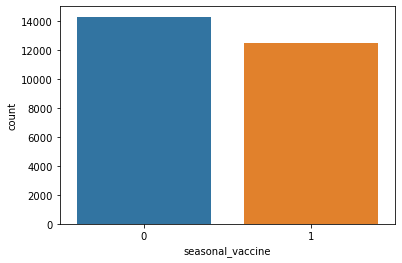

In [38]:
# checking the distribution of the target variable

sns.countplot(data=target, x="seasonal_vaccine")
plt.savefig("images/seasonal_vaccine_count_plot.png")